In [6]:
import toml
import matplotlib.pyplot as plt
cfg = toml.load('../UserPrediction6DOF/tools/config.toml')
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import os

dest = '../results/plotter'
targets = pd.read_csv('../results/targets/targets.csv')
dataset_lengh_sec = targets.shape[0]
ts = np.arange(0, dataset_lengh_sec + cfg['dt'], cfg['dt'])

# Models
base = pd.read_csv('../results/predictions/baseline/baseline_predictions.csv', names=["x", "y", "z", "qx", "qy", "qz", "qw"])
gru1 = pd.read_csv('../results/predictions/gru1/MAE_pos_0.0099_hid1024_batch512_epochs500_LR0.0001_every50_epochs_with_WD2e-12_for_LAT100_15.08_073303.csv',
                          names=["x", "y", "z", "qx", "qy", "qz", "qw"])
lstm1 = pd.read_csv('../results/predictions/gru1/MAE_pos_0.0099_hid1024_batch512_epochs500_LR0.0001_every50_epochs_with_WD2e-12_for_LAT100_15.08_073303.csv',
                          names=["x", "y", "z", "qx", "qy", "qz", "qw"])

In [72]:
print(targets.head(25))

           x         y         z        qx        qy        qz        qw
0   5.833978  0.005407  5.231646  0.007795 -0.824384  0.014309  0.565796
1   5.833207  0.005359  5.231712  0.007796 -0.824523  0.014235  0.565596
2   5.832435  0.005312  5.231779  0.007797 -0.824662  0.014160  0.565395
3   5.831663  0.005265  5.231845  0.007798 -0.824800  0.014086  0.565195
4   5.830624  0.005130  5.231941  0.007861 -0.824975  0.014067  0.564939
5   5.829586  0.004994  5.232038  0.007947 -0.825164  0.014069  0.564662
6   5.828547  0.004859  5.232134  0.008033 -0.825352  0.014071  0.564386
7   5.827393  0.004767  5.232290  0.008129 -0.825564  0.014111  0.564073
8   5.826239  0.004675  5.232446  0.008251 -0.825830  0.014237  0.563680
9   5.825085  0.004583  5.232602  0.008372 -0.826095  0.014362  0.563286
10  5.824142  0.004534  5.232727  0.008509 -0.826354  0.014491  0.562900
11  5.823198  0.004486  5.232852  0.008727 -0.826588  0.014634  0.562549
12  5.822255  0.004437  5.232976  0.008944 -0.82682

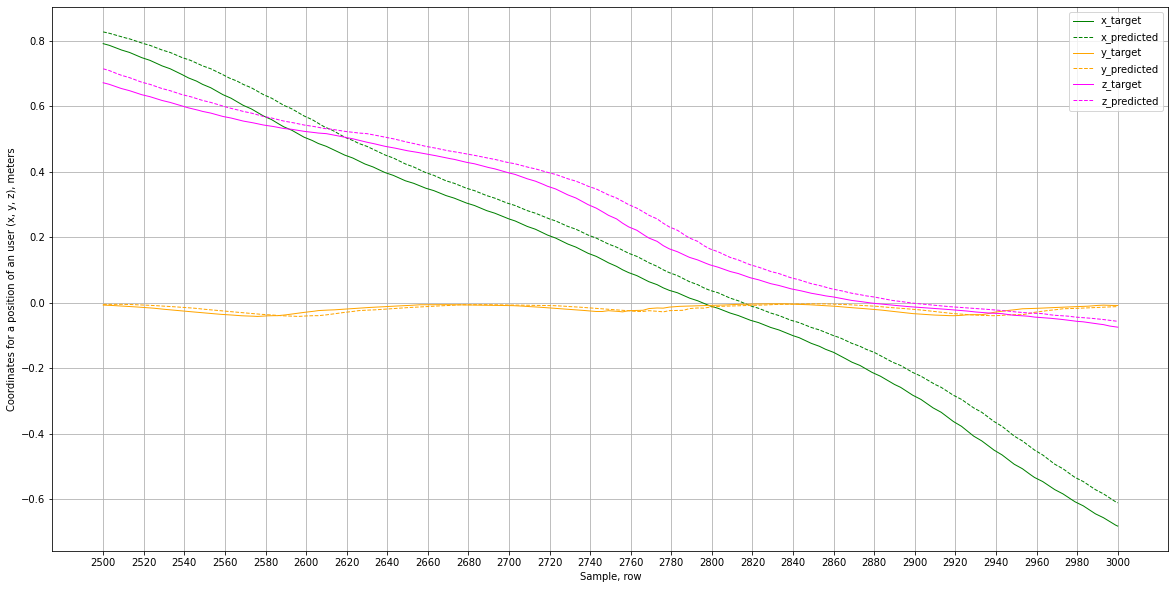

In [62]:
axis = 'x'
model = base
model_name = "base_zoom"
min_x = 2500
max_x = 3000

fig = plt.figure()
plt.plot(targets.loc[min_x:max_x, axis], color='green', linestyle='solid', label=(axis + '_target'), linewidth=1)
plt.plot(model.loc[min_x:max_x, axis], color='green', linestyle='dashed', label=(axis + '_predicted'), linewidth=1)

axis = 'y'
plt.plot(targets.loc[min_x:max_x, axis], color='orange', linestyle='solid', label=(axis + '_target'), linewidth=1)
plt.plot(model.loc[min_x:max_x, axis], color='orange', linestyle='dashed', label=(axis + '_predicted'), linewidth=1)

axis = 'z'
plt.plot(targets.loc[min_x:max_x, axis], color='magenta', linestyle='solid', label=(axis + '_target'), linewidth=1)
plt.plot(model.loc[min_x:max_x, axis], color='magenta', linestyle='dashed', label=(axis + '_predicted'), linewidth=1)


fig.set_figwidth(20)
fig.set_figheight(10)
plt.xlabel('Sample, row')
plt.ylabel('Coordinates for a position of an user (x, y, z), meters')
plt.legend()
plt.grid()
plt.xticks(np.arange(min_x, max_x+1, 20))
plt.show()

axis = "xyz_position"
out = os.path.join(dest, f"{model_name}-{axis}.pdf")
fig.savefig(out)

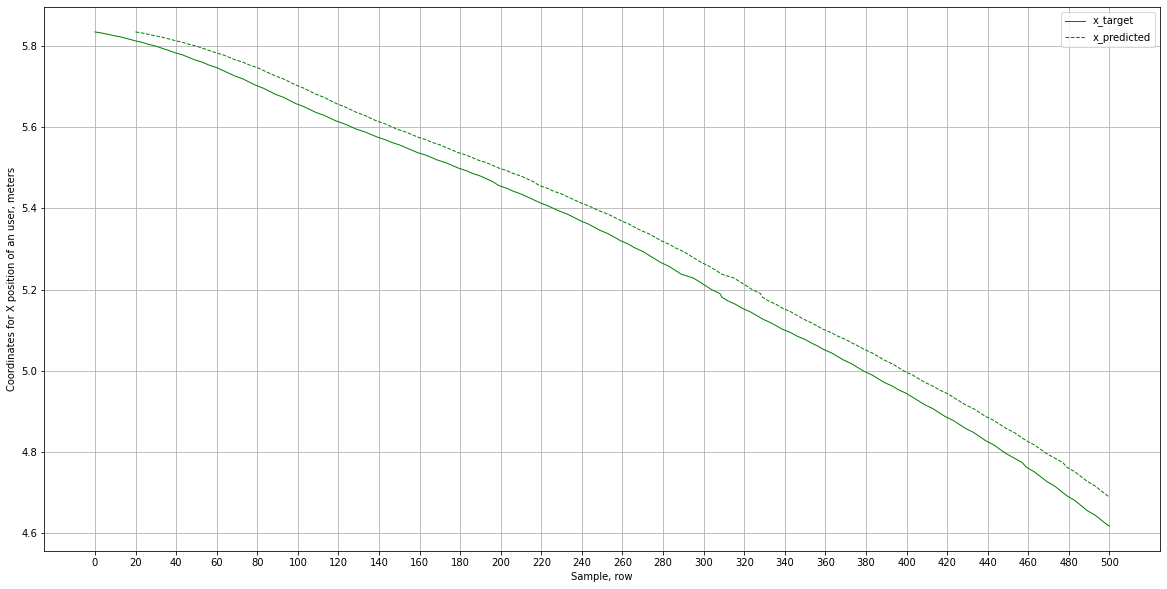

In [63]:
axis = 'x'
model = base
model_name = "base_zoom"
min_x = 0
max_x = 500

fig = plt.figure()
plt.plot(targets.loc[min_x:max_x, axis], color='green', linestyle='solid', label=(axis + '_target'), linewidth=1)
plt.plot(model.loc[min_x:max_x, axis], color='green', linestyle='dashed', label=(axis + '_predicted'), linewidth=1)

fig.set_figwidth(20)
fig.set_figheight(10)
plt.xlabel('Sample, row')
plt.ylabel('Coordinates for X position of an user, meters')
plt.legend()
plt.grid()
plt.xticks(np.arange(min_x, max_x+1, 20))
plt.show()

out = os.path.join(dest, f"{model_name}-{axis}.pdf")
fig.savefig(out)

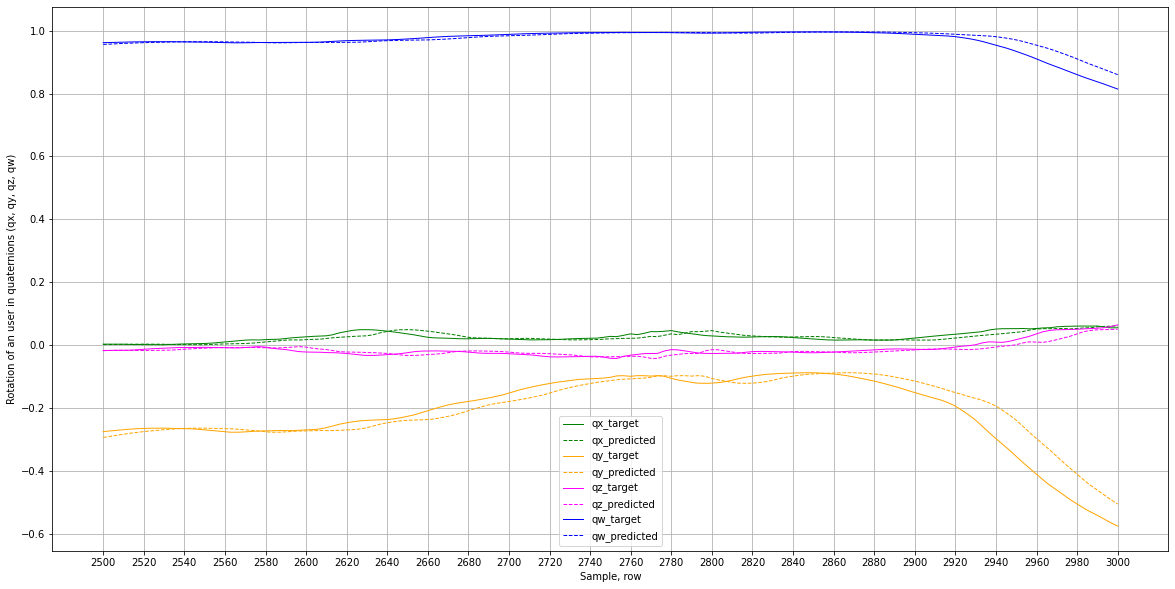

In [70]:
axis = 'qx'
model = base
model_name = "base_zoom"
min_x = 2500
max_x = 3000

fig = plt.figure()
plt.plot(targets.loc[min_x:max_x, axis], color='green', linestyle='solid', label=(axis + '_target'), linewidth=1)
plt.plot(model.loc[min_x:max_x, axis], color='green', linestyle='dashed', label=(axis + '_predicted'), linewidth=1)

axis = 'qy'
plt.plot(targets.loc[min_x:max_x, axis], color='orange', linestyle='solid', label=(axis + '_target'), linewidth=1)
plt.plot(model.loc[min_x:max_x, axis], color='orange', linestyle='dashed', label=(axis + '_predicted'), linewidth=1)

axis = 'qz'
plt.plot(targets.loc[min_x:max_x, axis], color='magenta', linestyle='solid', label=(axis + '_target'), linewidth=1)
plt.plot(model.loc[min_x:max_x, axis], color='magenta', linestyle='dashed', label=(axis + '_predicted'), linewidth=1)

axis = 'qw'
plt.plot(targets.loc[min_x:max_x, axis], color='blue', linestyle='solid', label=(axis + '_target'), linewidth=1)
plt.plot(model.loc[min_x:max_x, axis], color='blue', linestyle='dashed', label=(axis + '_predicted'), linewidth=1)


fig.set_figwidth(20)
fig.set_figheight(10)
plt.xlabel('Sample, row')
plt.ylabel('Rotation of an user in quaternions (qx, qy, qz, qw)')
plt.legend()
plt.grid()
plt.xticks(np.arange(min_x, max_x+1, 20))
plt.show()

axis = "qx_qy_qz_qw_rotation"
out = os.path.join(dest, f"{model_name}-{axis}.pdf")
fig.savefig(out)

In [135]:
import pandas as pd
from scipy.spatial.transform import Rotation
quat_df = targets[['qx', 'qy', 'qz', 'qw']]
quat_df = quat_df.iloc[min_x:max_x]
rot = Rotation.from_quat(quat_df)
rot_euler_target = rot.as_euler('xyz', degrees=True)

quat_df = base[['qx', 'qy', 'qz', 'qw']]
quat_df = quat_df.iloc[min_x:max_x]
rot = Rotation.from_quat(quat_df)
rot_euler_base = rot.as_euler('xyz', degrees=True)

rot_euler_target_df = pd.DataFrame(rot_euler_target, columns = ['roll_x','pitch_y','yaw_z'])
rot_euler_base_df = pd.DataFrame(rot_euler_base, columns = ['roll_x','pitch_y','yaw_z'])

print(rot_euler_target_df.head())

     roll_x    pitch_y     yaw_z
0  1.102500 -31.802535 -2.272869
1  1.096229 -31.728220 -2.264727
2  1.089976 -31.653901 -2.256600
3  1.083739 -31.579584 -2.248490
4  1.073873 -31.503329 -2.236838


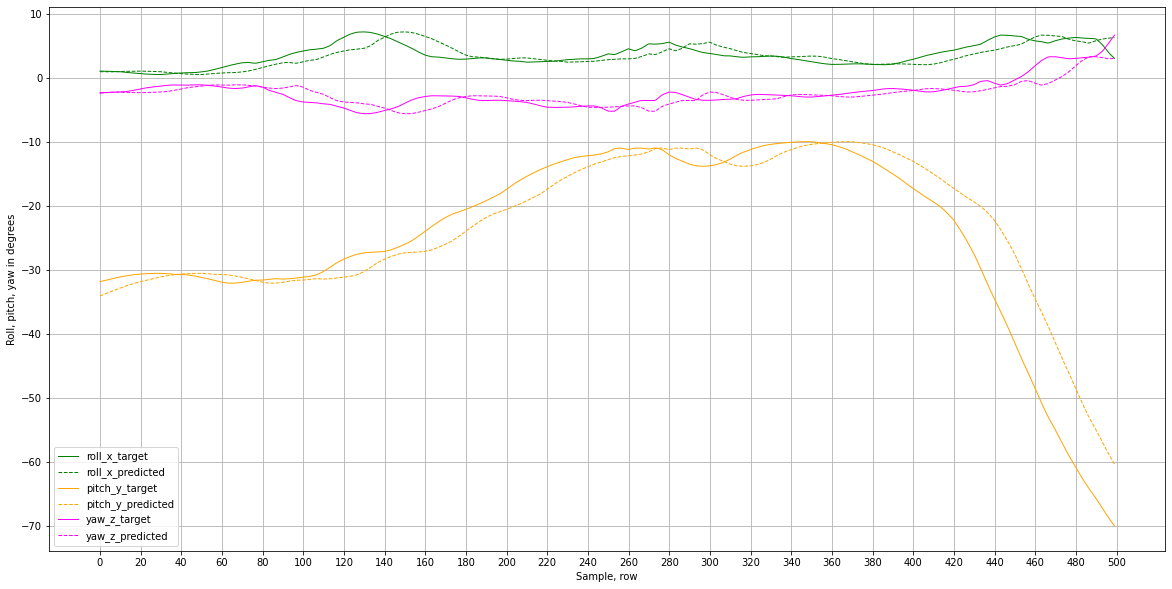

In [136]:
axis = 'roll_x'
model = base
model_name = "base_euler"
min_x = 0
max_x = 500

fig = plt.figure()
plt.plot(rot_euler_target_df.loc[min_x:max_x, axis], color='green', linestyle='solid', label=(axis + '_target'), linewidth=1)
plt.plot(rot_euler_base_df.loc[min_x:max_x, axis], color='green', linestyle='dashed', label=(axis + '_predicted'), linewidth=1)

axis = 'pitch_y'
plt.plot(rot_euler_target_df.loc[min_x:max_x, axis], color='orange', linestyle='solid', label=(axis + '_target'), linewidth=1)
plt.plot(rot_euler_base_df.loc[min_x:max_x, axis], color='orange', linestyle='dashed', label=(axis + '_predicted'), linewidth=1)

axis = 'yaw_z'
plt.plot(rot_euler_target_df.loc[min_x:max_x, axis], color='magenta', linestyle='solid', label=(axis + '_target'), linewidth=1)
plt.plot(rot_euler_base_df.loc[min_x:max_x, axis], color='magenta', linestyle='dashed', label=(axis + '_predicted'), linewidth=1)


fig.set_figwidth(20)
fig.set_figheight(10)
plt.xlabel('Sample, row')
plt.ylabel('Roll, pitch, yaw in degrees')
plt.legend()
plt.grid()
plt.xticks(np.arange(min_x, max_x+1, 20))
plt.show()

axis = "roll_pitch_yaw"
out = os.path.join(dest, f"{model_name}-{axis}.pdf")
fig.savefig(out)

In [138]:
#=================================================

   Train_loss  Val_loss
0    3.901920  1.589996
1    1.867333  0.737513
2    1.080865  0.598875
3    0.693927  0.530679
4    0.469165  0.439439


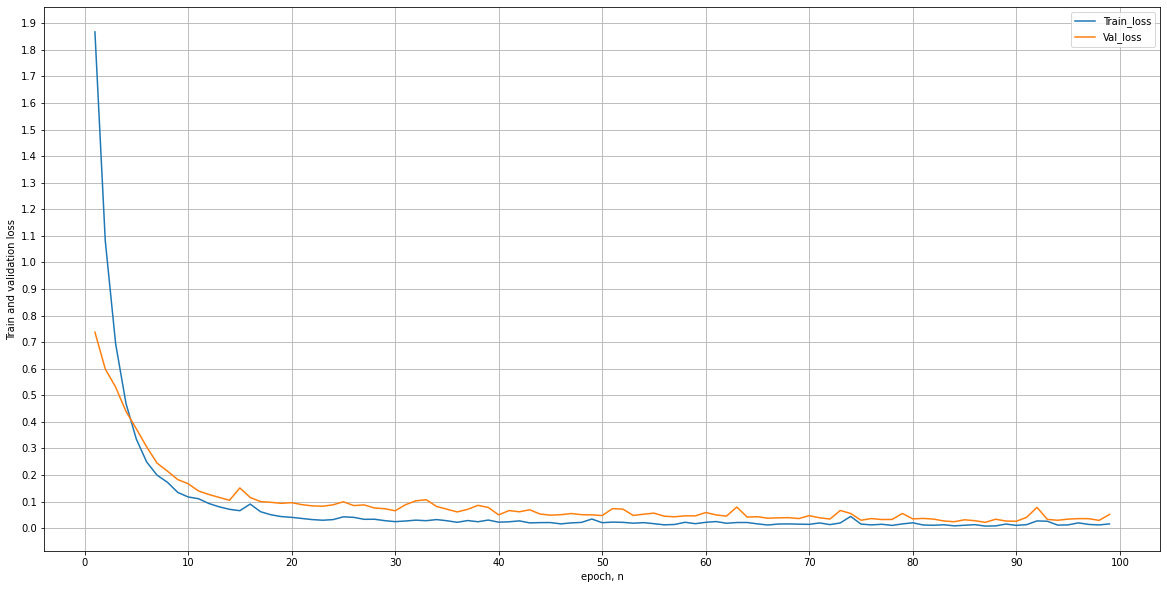

In [151]:
lstm1_weight_decay = pd.read_csv('../results/losses/lstm1/MAE_pos_0.2133_hid32_batch512_epochs150_LR0.001_every50_epochs_with_WD1e-06_for_LAT100_29.09_104440.csv')
losses = lstm1_weight_decay
print(losses.head())
epochs = 100
los_fig = plt.figure()
plt.plot(losses.loc[1:epochs-1, 'Train_loss'], label='Train_loss')
plt.plot(losses.loc[1:epochs-1, 'Val_loss'], label='Val_loss')
los_fig.set_figwidth(20)
los_fig.set_figheight(10)
plt.xlabel('epoch, n')
plt.ylabel('Train and validation loss')
plt.legend()
plt.grid()
plt.xticks(np.arange(0, 100+1, 10))
plt.yticks(np.arange(0, 2, 0.1))
plt.show()
los_fig.savefig('../results/losses/lstm1_weight_decay_high.pdf')


   Train_loss  Val_loss
0    5.214750  3.478826
1    5.210248  3.475546
2    5.205792  3.472277
3    5.201344  3.469015
4    5.196903  3.465759


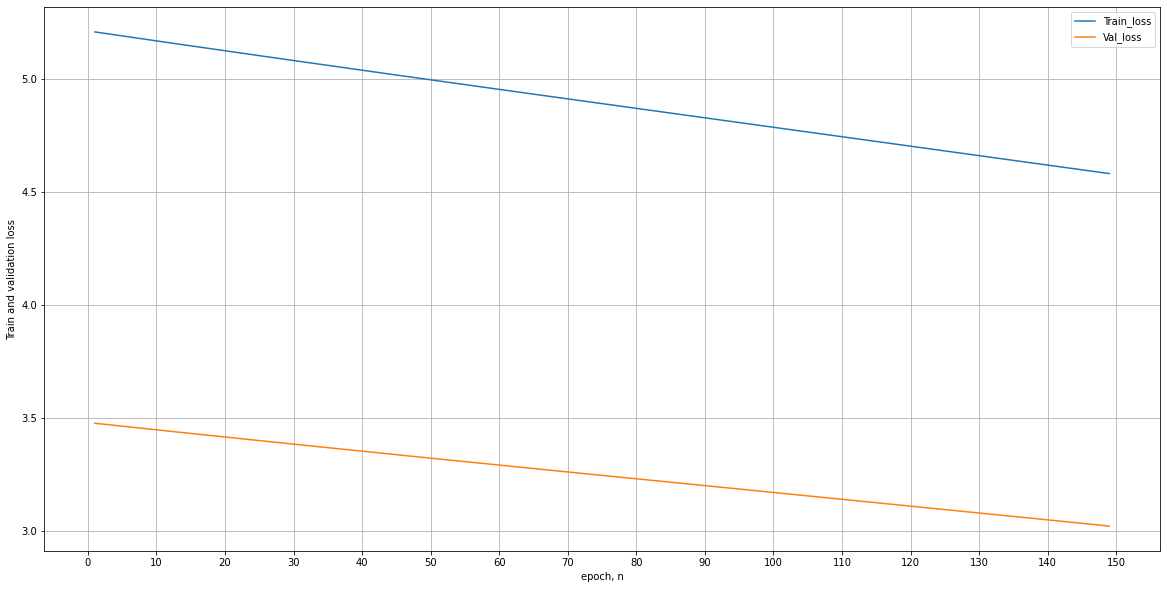

In [155]:
lstm1_weight_decay = pd.read_csv('../results/losses/lstm1/MAE_pos_3.7003_hid64_batch512_epochs150_LR1e-06_every50_epochs_with_WD1e-06_for_LAT100_29.09_112345.csv')
losses = lstm1_weight_decay
print(losses.head())
epochs = 150
los_fig = plt.figure()
plt.plot(losses.loc[1:epochs-1, 'Train_loss'], label='Train_loss')
plt.plot(losses.loc[1:epochs-1, 'Val_loss'], label='Val_loss')
los_fig.set_figwidth(20)
los_fig.set_figheight(10)
plt.xlabel('epoch, n')
plt.ylabel('Train and validation loss')
plt.legend()
plt.grid()
plt.xticks(np.arange(0, 150+1, 10))
plt.show()
los_fig.savefig('../results/losses/lstm1_lr_low.pdf')


In [ ]:
#=====================================

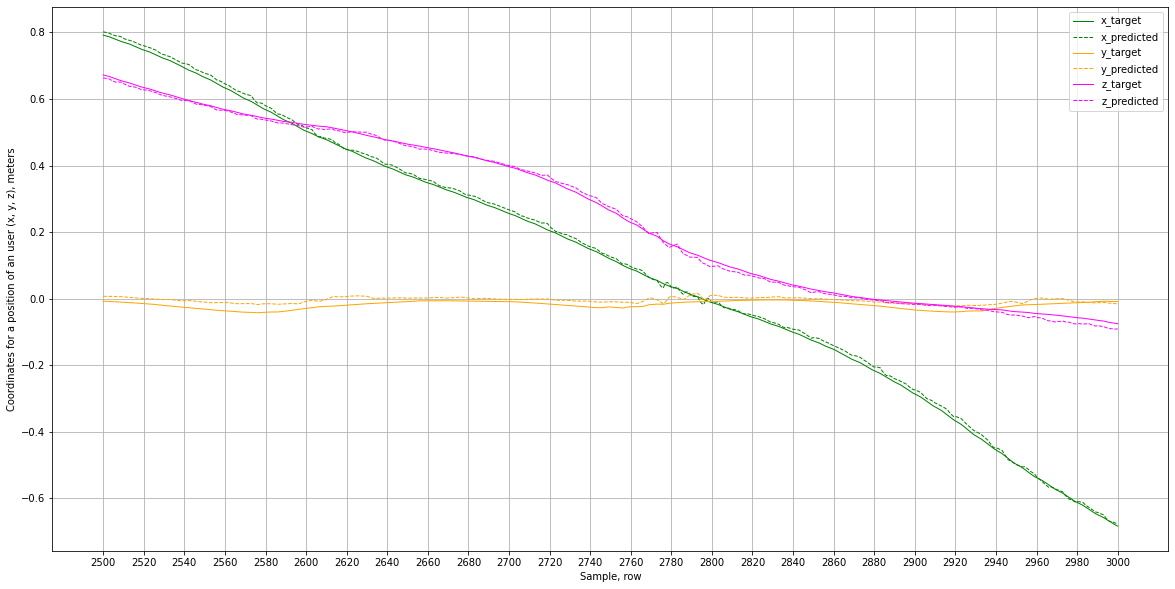

In [156]:
axis = 'x'
model = pd.read_csv('../results/predictions/lstm1/MAE_pos_0.0200_hid1024_batch512_epochs500_LR0.001_every50_epochs_with_WD1e-12_for_LAT100_29.09_140307.csv',
                          names=["x", "y", "z", "qx", "qy", "qz", "qw"])
model_name = "lstm1_interpolated"
min_x = 2500
max_x = 3000

fig = plt.figure()
plt.plot(targets.loc[min_x:max_x, axis], color='green', linestyle='solid', label=(axis + '_target'), linewidth=1)
plt.plot(model.loc[min_x:max_x, axis], color='green', linestyle='dashed', label=(axis + '_predicted'), linewidth=1)

axis = 'y'
plt.plot(targets.loc[min_x:max_x, axis], color='orange', linestyle='solid', label=(axis + '_target'), linewidth=1)
plt.plot(model.loc[min_x:max_x, axis], color='orange', linestyle='dashed', label=(axis + '_predicted'), linewidth=1)

axis = 'z'
plt.plot(targets.loc[min_x:max_x, axis], color='magenta', linestyle='solid', label=(axis + '_target'), linewidth=1)
plt.plot(model.loc[min_x:max_x, axis], color='magenta', linestyle='dashed', label=(axis + '_predicted'), linewidth=1)


fig.set_figwidth(20)
fig.set_figheight(10)
plt.xlabel('Sample, row')
plt.ylabel('Coordinates for a position of an user (x, y, z), meters')
plt.legend()
plt.grid()
plt.xticks(np.arange(min_x, max_x+1, 20))
plt.show()

axis = "xyz_position"
out = os.path.join(dest, f"{model_name}-{axis}.pdf")
fig.savefig(out)

       roll_x    pitch_y       yaw_z
0 -177.646032 -68.921699  179.467911
1 -177.667559 -68.893915  179.483473
2 -177.689039 -68.866128  179.498987
3 -177.710471 -68.838337  179.514452
4 -177.728874 -68.802999  179.536574


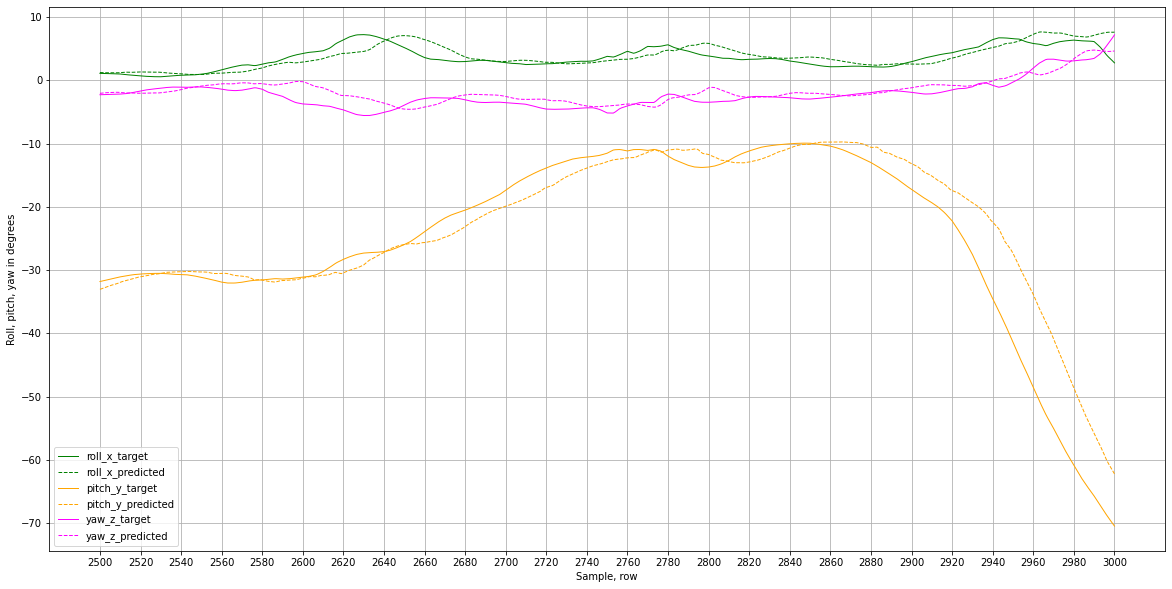

In [158]:
import pandas as pd
from scipy.spatial.transform import Rotation

axis = 'roll_x'
model = pd.read_csv('../results/predictions/lstm1/MAE_pos_0.0200_hid1024_batch512_epochs500_LR0.001_every50_epochs_with_WD1e-12_for_LAT100_29.09_140307.csv',
                          names=["x", "y", "z", "qx", "qy", "qz", "qw"])
model_name = "lstm1_interpolated"


quat_df = targets[['qx', 'qy', 'qz', 'qw']]
rot = Rotation.from_quat(quat_df)
rot_euler_target = rot.as_euler('xyz', degrees=True)

quat_df = model[['qx', 'qy', 'qz', 'qw']]
rot = Rotation.from_quat(quat_df)
rot_euler_base = rot.as_euler('xyz', degrees=True)

rot_euler_target_df = pd.DataFrame(rot_euler_target, columns = ['roll_x','pitch_y','yaw_z'])
rot_euler_base_df = pd.DataFrame(rot_euler_base, columns = ['roll_x','pitch_y','yaw_z'])

print(rot_euler_target_df.head())

min_x = 2500
max_x = 3000

fig = plt.figure()
plt.plot(rot_euler_target_df.loc[min_x:max_x, axis], color='green', linestyle='solid', label=(axis + '_target'), linewidth=1)
plt.plot(rot_euler_base_df.loc[min_x:max_x, axis], color='green', linestyle='dashed', label=(axis + '_predicted'), linewidth=1)

axis = 'pitch_y'
plt.plot(rot_euler_target_df.loc[min_x:max_x, axis], color='orange', linestyle='solid', label=(axis + '_target'), linewidth=1)
plt.plot(rot_euler_base_df.loc[min_x:max_x, axis], color='orange', linestyle='dashed', label=(axis + '_predicted'), linewidth=1)

axis = 'yaw_z'
plt.plot(rot_euler_target_df.loc[min_x:max_x, axis], color='magenta', linestyle='solid', label=(axis + '_target'), linewidth=1)
plt.plot(rot_euler_base_df.loc[min_x:max_x, axis], color='magenta', linestyle='dashed', label=(axis + '_predicted'), linewidth=1)


fig.set_figwidth(20)
fig.set_figheight(10)
plt.xlabel('Sample, row')
plt.ylabel('Roll, pitch, yaw in degrees')
plt.legend()
plt.grid()
plt.xticks(np.arange(min_x, max_x+1, 20))
plt.show()

axis = "roll_pitch_yaw"
out = os.path.join(dest, f"{model_name}-{axis}.pdf")
fig.savefig(out)